In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [96]:
train_df = pd.read_csv('/home/karen/Documents/Datasets/Store Sales Forecasting/train.csv')
# train_df = train.set_index('id')
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [98]:
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [99]:
train_df["date"] = pd.to_datetime(train_df["date"])
train_df = train_df.set_index('date')
train_df

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [100]:
train_df["year"] = train_df.index.year
train_df["month"] = train_df.index.month
train_df 

,id,store_nbr,family,sales,onpromotion,year,month
date,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0,2013,1
2013-01-01,1,1,BABY CARE,0.000,0,2013,1
2013-01-01,2,1,BEAUTY,0.000,0,2013,1
2013-01-01,3,1,BEVERAGES,0.000,0,2013,1
2013-01-01,4,1,BOOKS,0.000,0,2013,1
...,...,...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0,2017,8
2017-08-15,3000884,9,PREPARED FOODS,154.553,1,2017,8
2017-08-15,3000885,9,PRODUCE,2419.729,148,2017,8


In [101]:
train_df.family.value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

<Axes: xlabel='date', ylabel='sales'>

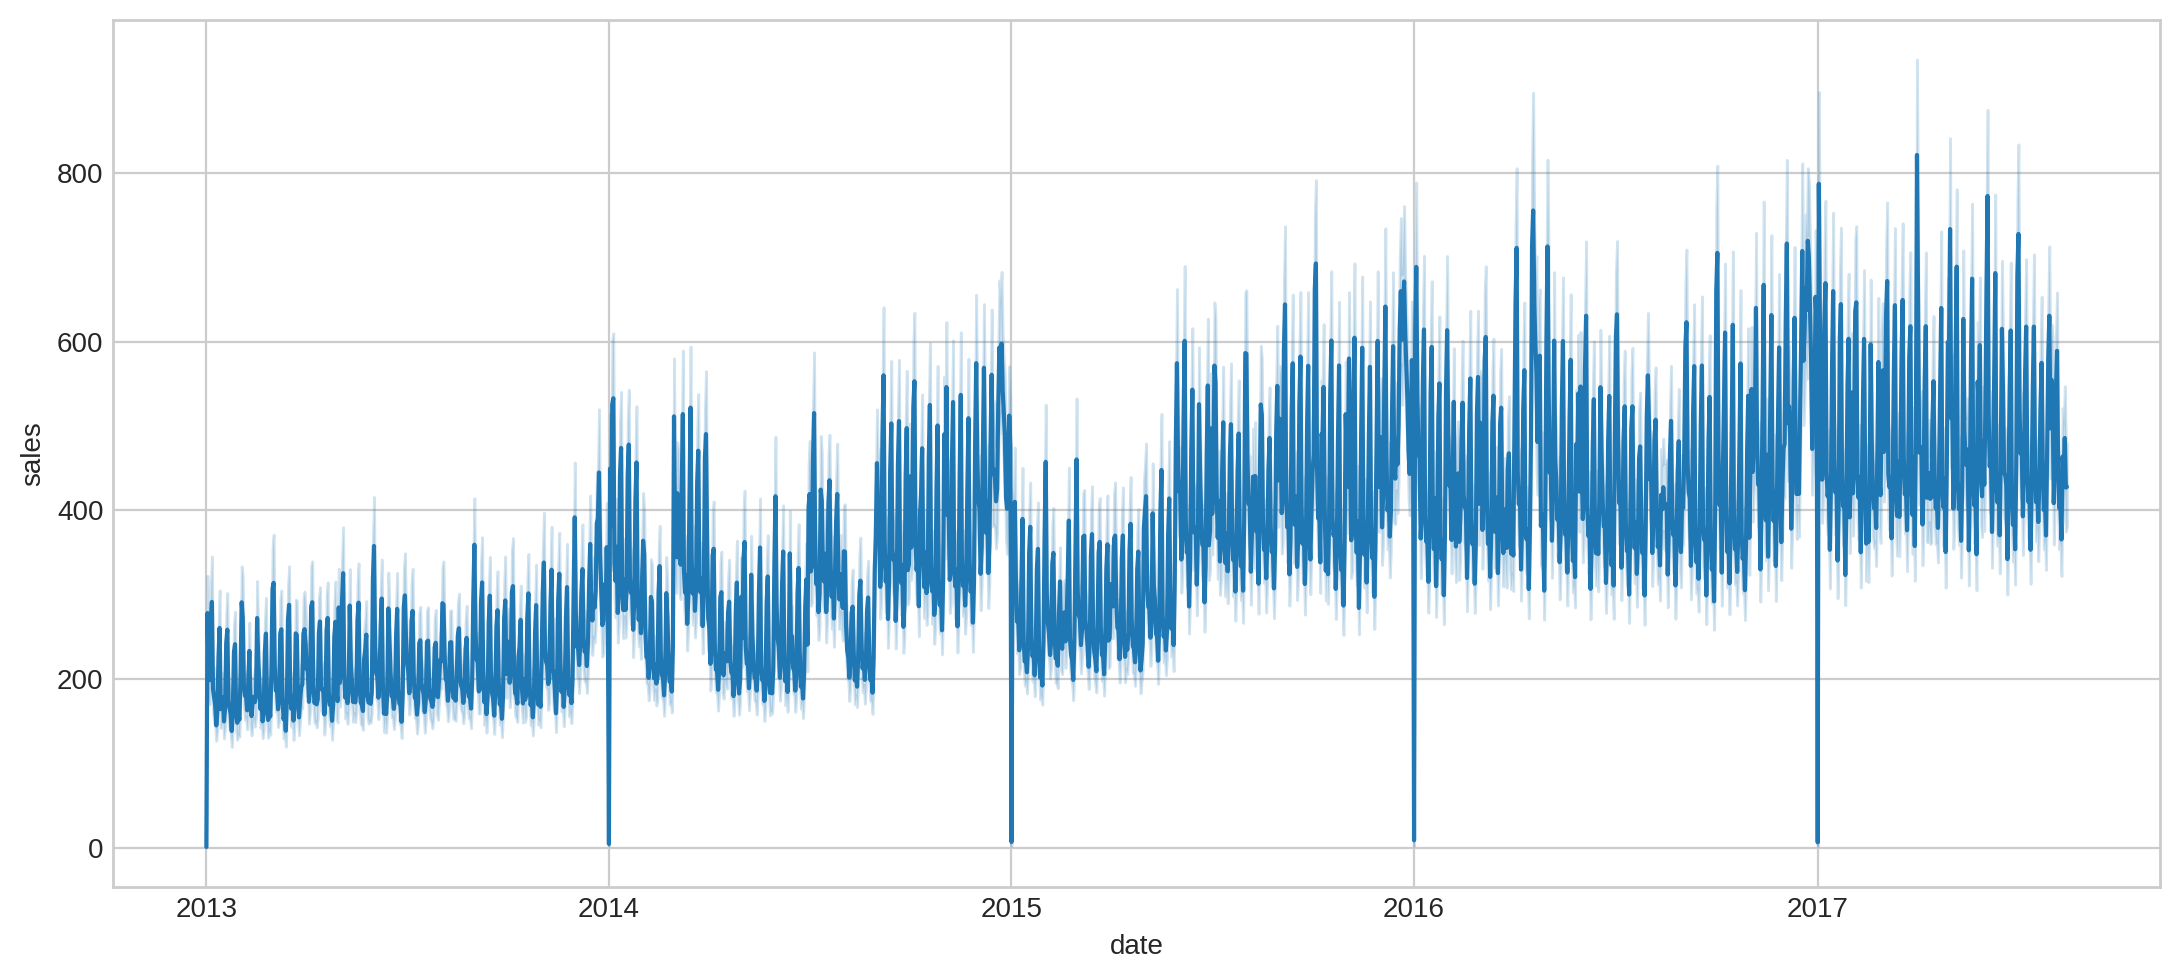

In [102]:
sns.lineplot(data = train_df["sales"])

<Axes: xlabel='date', ylabel='sales'>

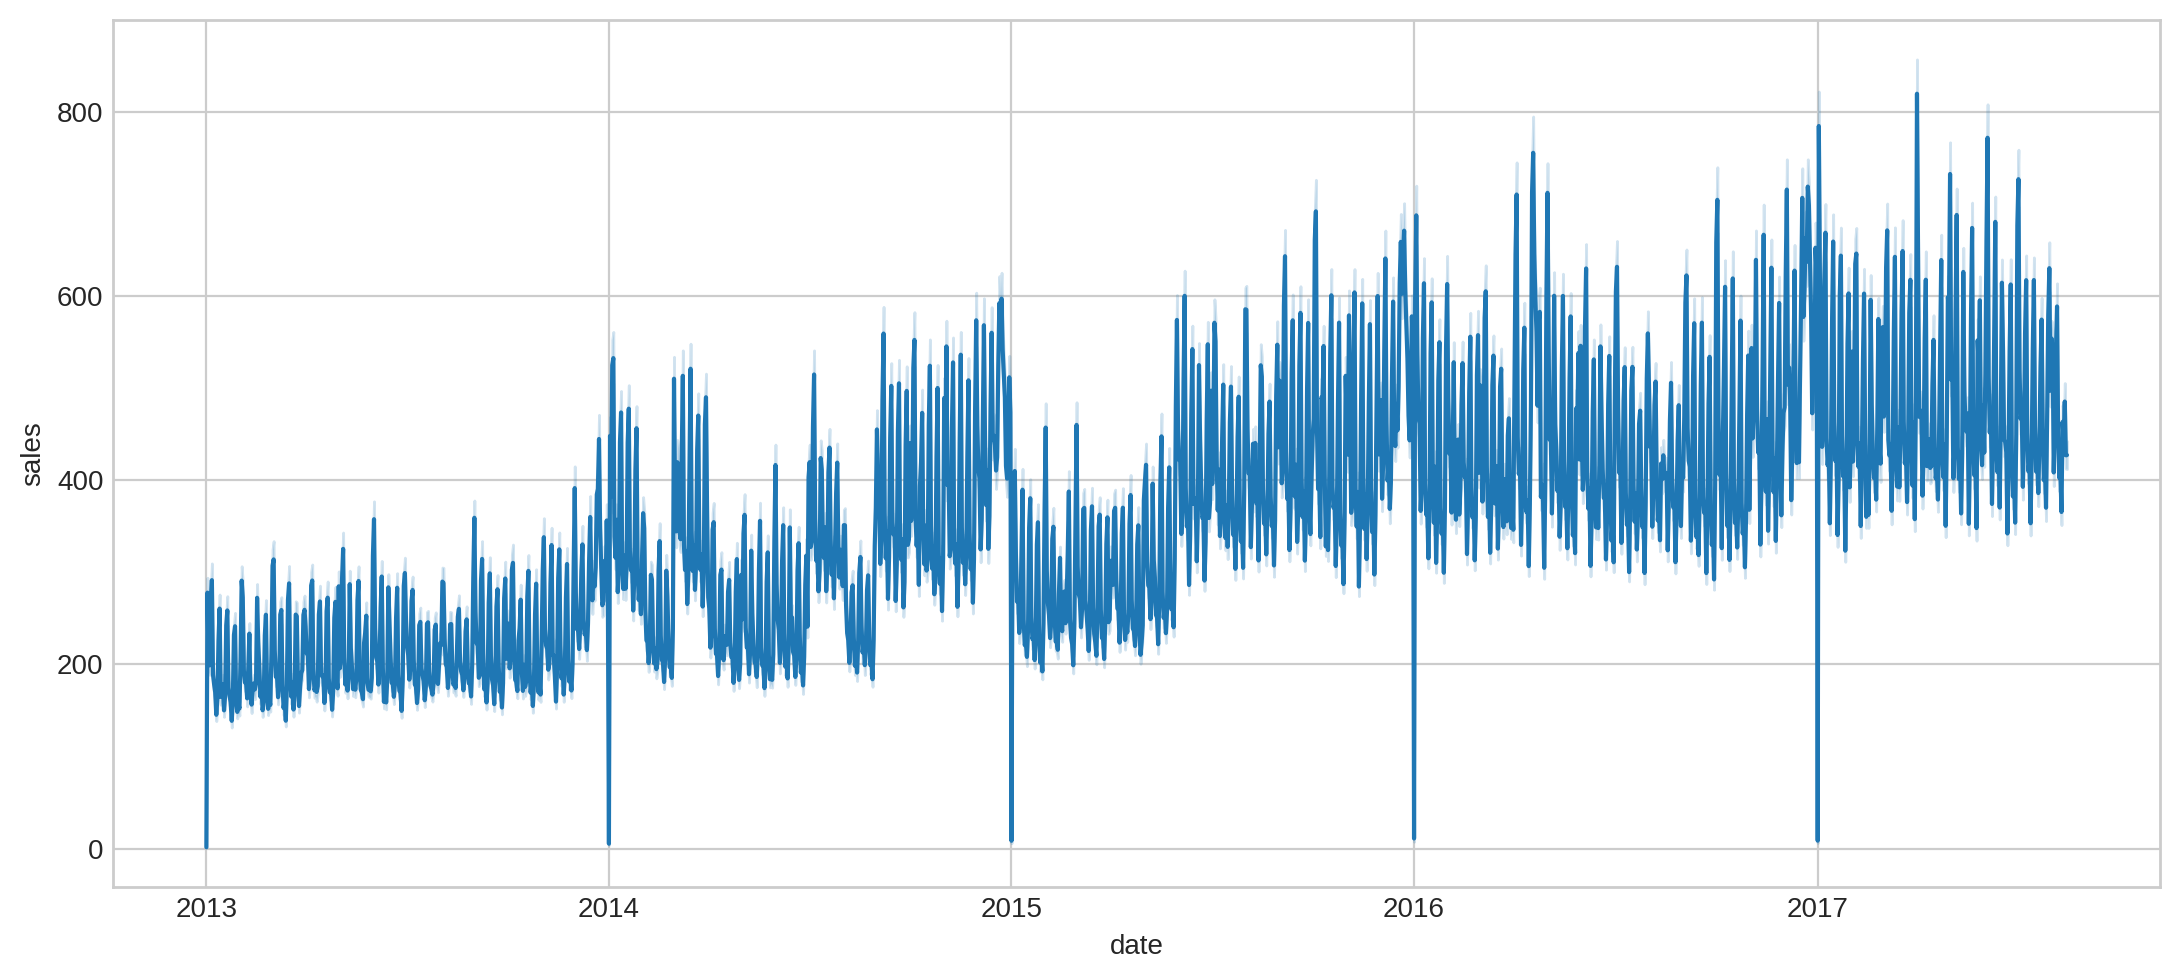

In [103]:
ma = train_df.sales.rolling(window=12).mean()
sns.lineplot(data=ma)

<Axes: xlabel='year', ylabel='sales'>

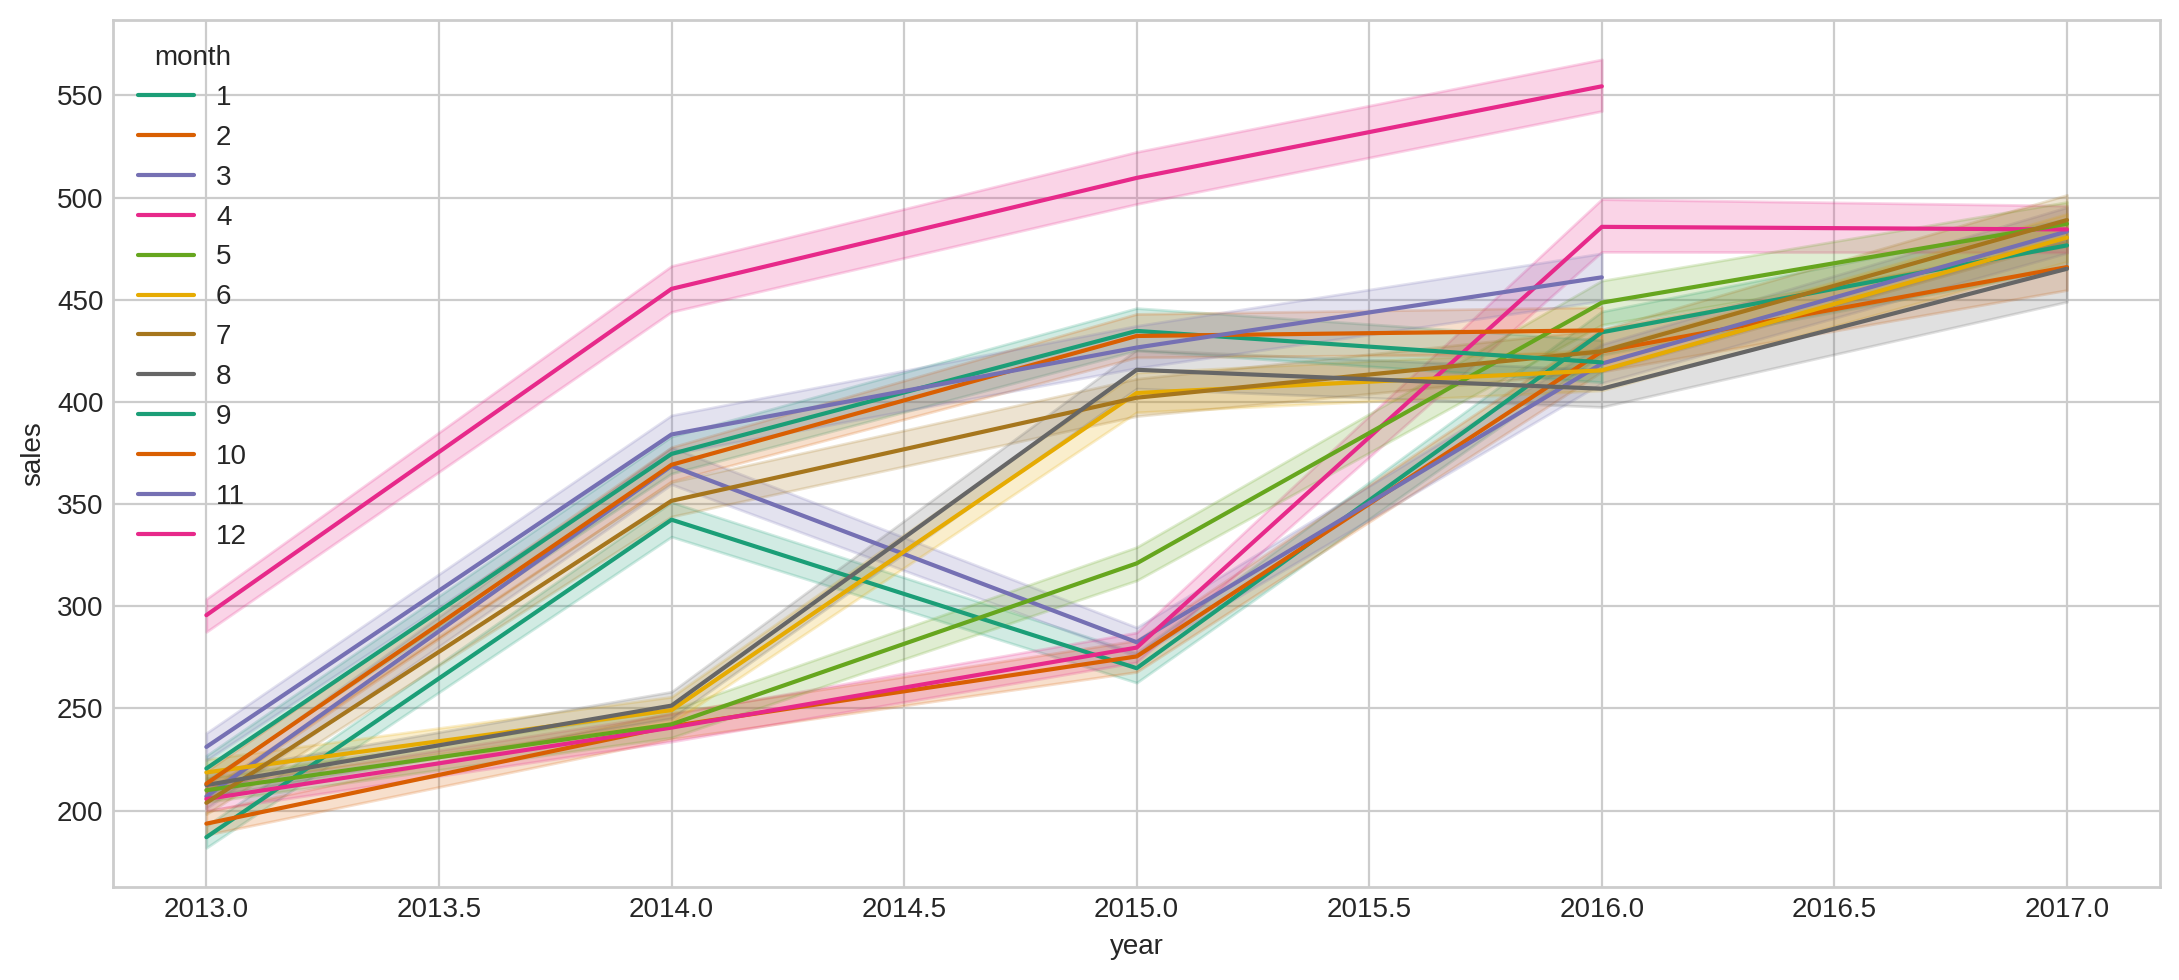

In [104]:
sns.lineplot(x='year', y='sales', data=train_df, hue="month", palette="Dark2")

In [105]:
store_sales = train_df.copy()
# store_sales = store_sales.set_index('date')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)

store_sales

id     sales  \
date       store_nbr family                                          
2013-01-01 1         AUTOMOTIVE                        0     0.000   
                     BABY CARE                         1     0.000   
                     BEAUTY                            2     0.000   
                     BEVERAGES                         3     0.000   
                     BOOKS                             4     0.000   
...                                                  ...       ...   
2017-08-15 9         POULTRY                     3000883   438.133   
                     PREPARED FOODS              3000884   154.553   
                     PRODUCE                     3000885  2419.729   
                     SCHOOL AND OFFICE SUPPLIES  3000886   121.000   
                     SEAFOOD                     3000887    16.000   

                                                 onpromotion  year  month  
date       store_nbr family                                                
2013-01-01 1         AUTOMOTIVE                            0  2013      1  
                     BABY CARE                             0  2013      1  
                     BEAUTY                                0  2013      1  
                     BEVERAGES                             0  2013      1  
                     BOOKS                                 0  2013      1  
...                                                      ...   ...    ...  
2017-08-15 9         POULTRY                               0  2017      8  
                     PREPARED FOODS                        1  2017      8  
                     PRODUCE                             148  2017      8  
                     SCHOOL AND OFFICE SUPPLIES            8  2017      8  
                     SEAFOOD                               0  2017      8  

[3000888 rows x 5 columns]

In [106]:
average_sales = store_sales.groupby('date').mean()['sales']
average_sales = average_sales.to_frame()
average_sales

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244
...,...
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618


In [107]:
average_sales['Time'] = np.arange(len(average_sales.index))
average_sales

,sales,Time
date,,
2013-01-01,1.409438,0
2013-01-02,278.390807,1
2013-01-03,202.840197,2
2013-01-04,198.911154,3
2013-01-05,267.873244,4
...,...,...
2017-08-11,463.733851,1679
2017-08-12,444.798280,1680
2017-08-13,485.768618,1681


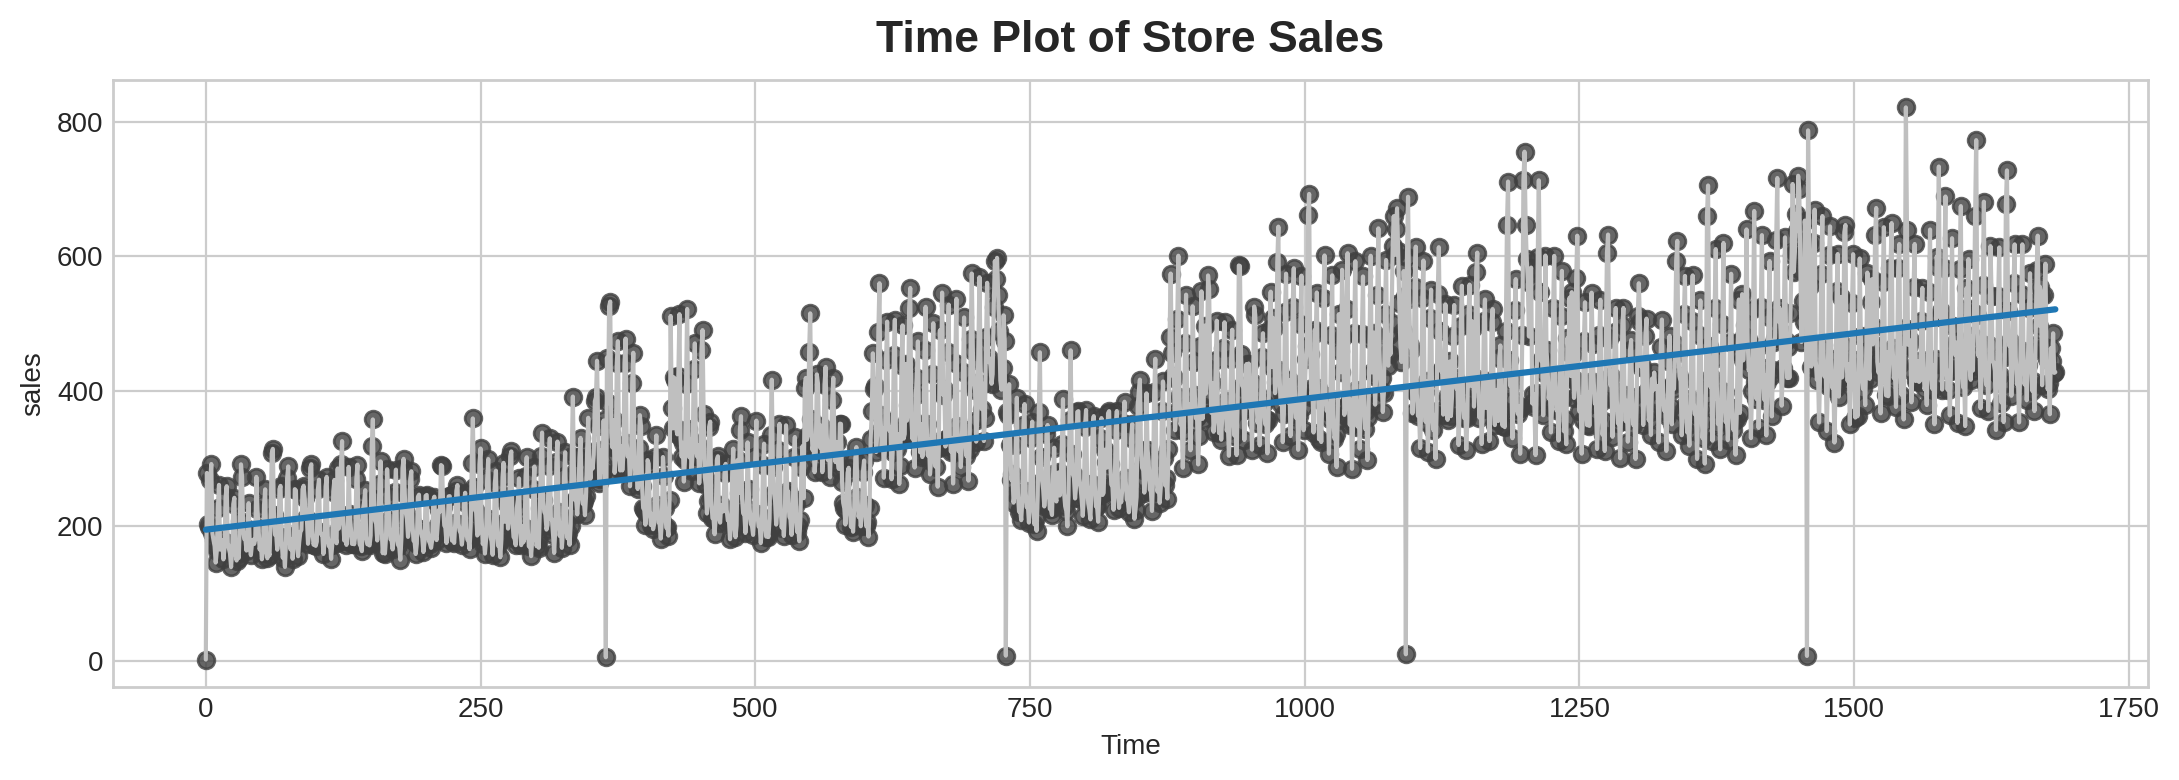

In [108]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()


ax.plot('Time', 'sales', data=average_sales, color='0.75')
ax = sns.regplot(x='Time', y='sales', data=average_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Store Sales');



In [109]:
train_df['Lag_1'] = train_df['sales'].shift(1)
# train_df = train_df.reindex(columns=['sales', 'Lag_1'])


In [110]:
average_sales['Lag_1'] = average_sales['sales'].shift(1)

In [111]:
average_sales.dropna()
average_sales

,sales,Time,Lag_1
date,,,
2013-01-01,1.409438,0,NaN
2013-01-02,278.390807,1,1.409438
2013-01-03,202.840197,2,278.390807
2013-01-04,198.911154,3,202.840197
2013-01-05,267.873244,4,198.911154
...,...,...,...
2017-08-11,463.733851,1679,365.536988
2017-08-12,444.798280,1680,463.733851
2017-08-13,485.768618,1681,444.798280


In [112]:
average_sales.drop('Time', axis=1, inplace=True)
average_sales

,sales,Lag_1
date,,
2013-01-01,1.409438,NaN
2013-01-02,278.390807,1.409438
2013-01-03,202.840197,278.390807
2013-01-04,198.911154,202.840197
2013-01-05,267.873244,198.911154
...,...,...
2017-08-11,463.733851,365.536988
2017-08-12,444.798280,463.733851
2017-08-13,485.768618,444.798280


In [113]:
train_df.dropna()

,id,store_nbr,family,sales,onpromotion,year,month,Lag_1
date,,,,,,,,
2013-01-01,1,1,BABY CARE,0.000,0,2013,1,0.000
2013-01-01,2,1,BEAUTY,0.000,0,2013,1,0.000
2013-01-01,3,1,BEVERAGES,0.000,0,2013,1,0.000
2013-01-01,4,1,BOOKS,0.000,0,2013,1,0.000
2013-01-01,5,1,BREAD/BAKERY,0.000,0,2013,1,0.000
...,...,...,...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0,2017,8,6.000
2017-08-15,3000884,9,PREPARED FOODS,154.553,1,2017,8,438.133
2017-08-15,3000885,9,PRODUCE,2419.729,148,2017,8,154.553


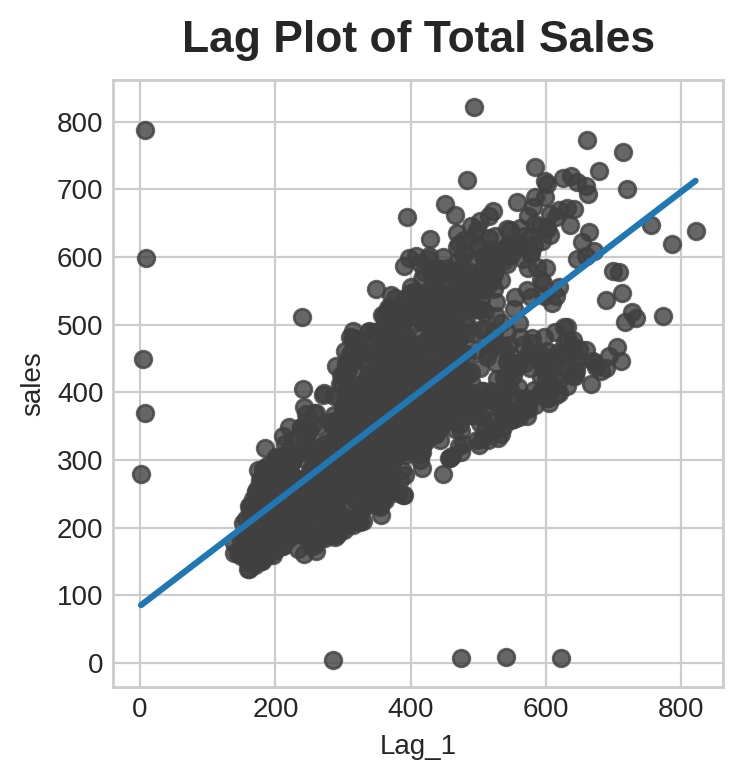

In [114]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='sales', data=average_sales, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Total Sales');

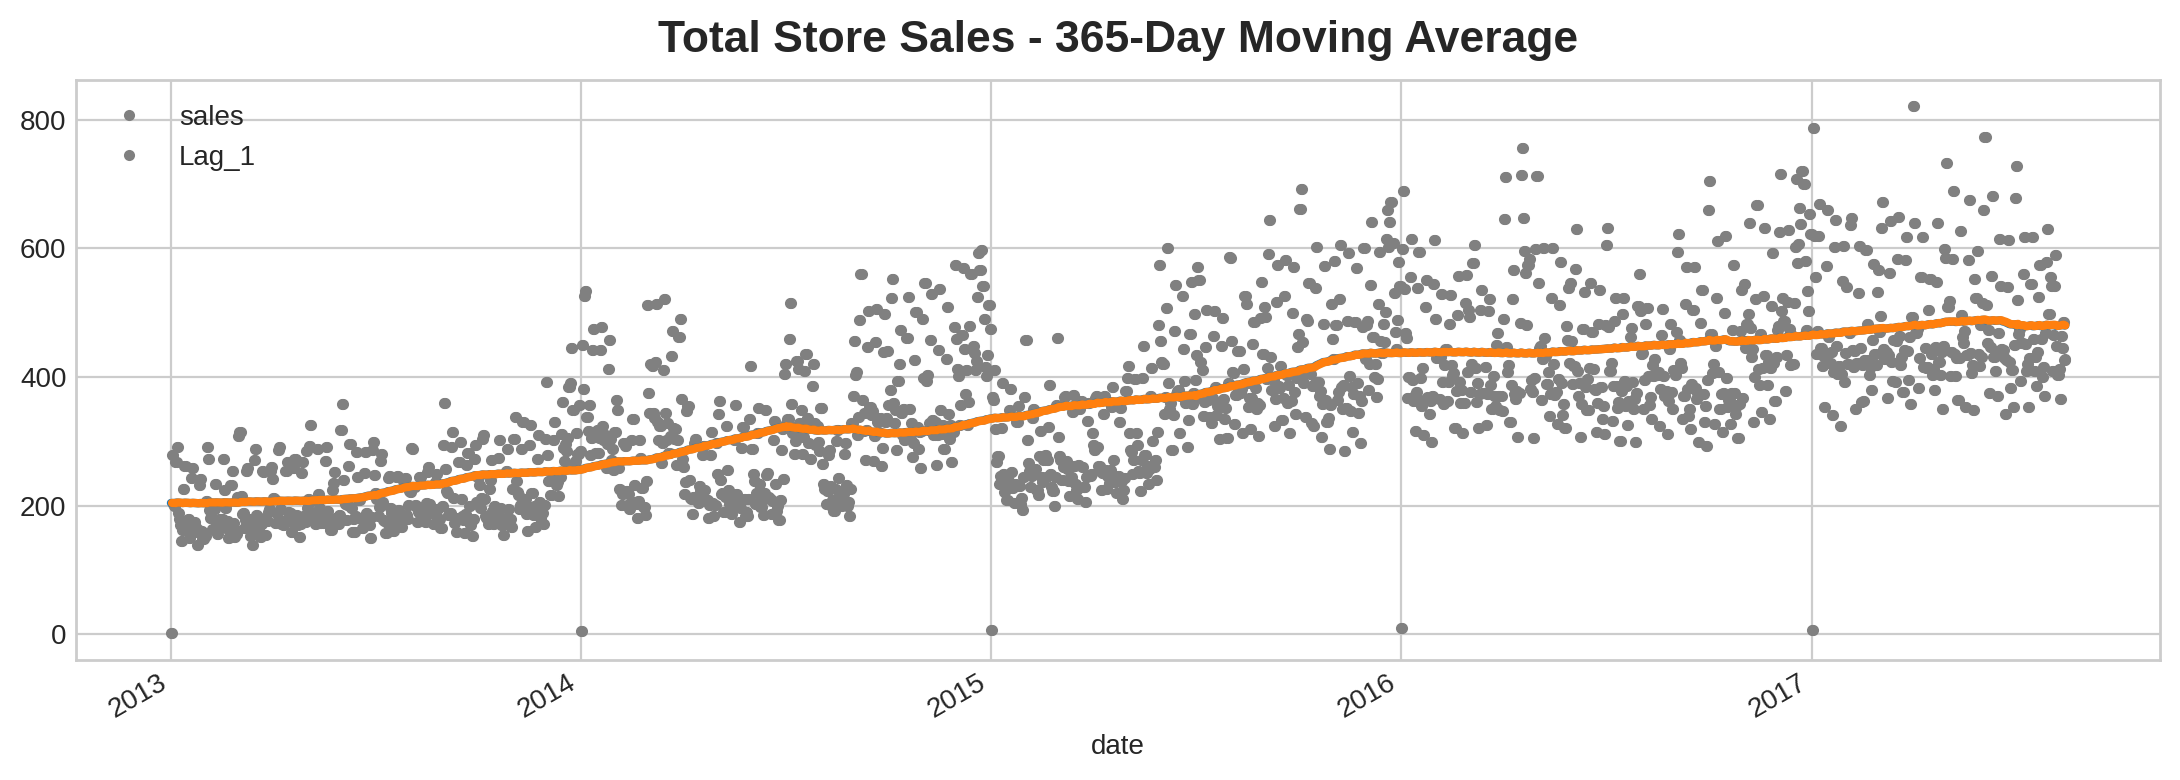

In [115]:
moving_average = average_sales.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = average_sales.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Total Store Sales - 365-Day Moving Average", legend=False,
);

In [116]:
from statsmodels.tsa.deterministic import DeterministicProcess

index = pd.period_range("2013-01-01", freq="D", periods=1684)
dp = DeterministicProcess(
    index=index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=3,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=90)


In [117]:
X_fore

,const,trend,trend_squared,trend_cubed
2017-08-12,1.0,1685.0,2839225.0,4.784094e+09
2017-08-13,1.0,1686.0,2842596.0,4.792617e+09
2017-08-14,1.0,1687.0,2845969.0,4.801150e+09
2017-08-15,1.0,1688.0,2849344.0,4.809693e+09
2017-08-16,1.0,1689.0,2852721.0,4.818246e+09
...,...,...,...,...
2017-11-05,1.0,1770.0,3132900.0,5.545233e+09
2017-11-06,1.0,1771.0,3136441.0,5.554637e+09
2017-11-07,1.0,1772.0,3139984.0,5.564052e+09
2017-11-08,1.0,1773.0,3143529.0,5.573477e+09


In [118]:
from sklearn.linear_model import LinearRegression

y = average_sales["sales"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=index)

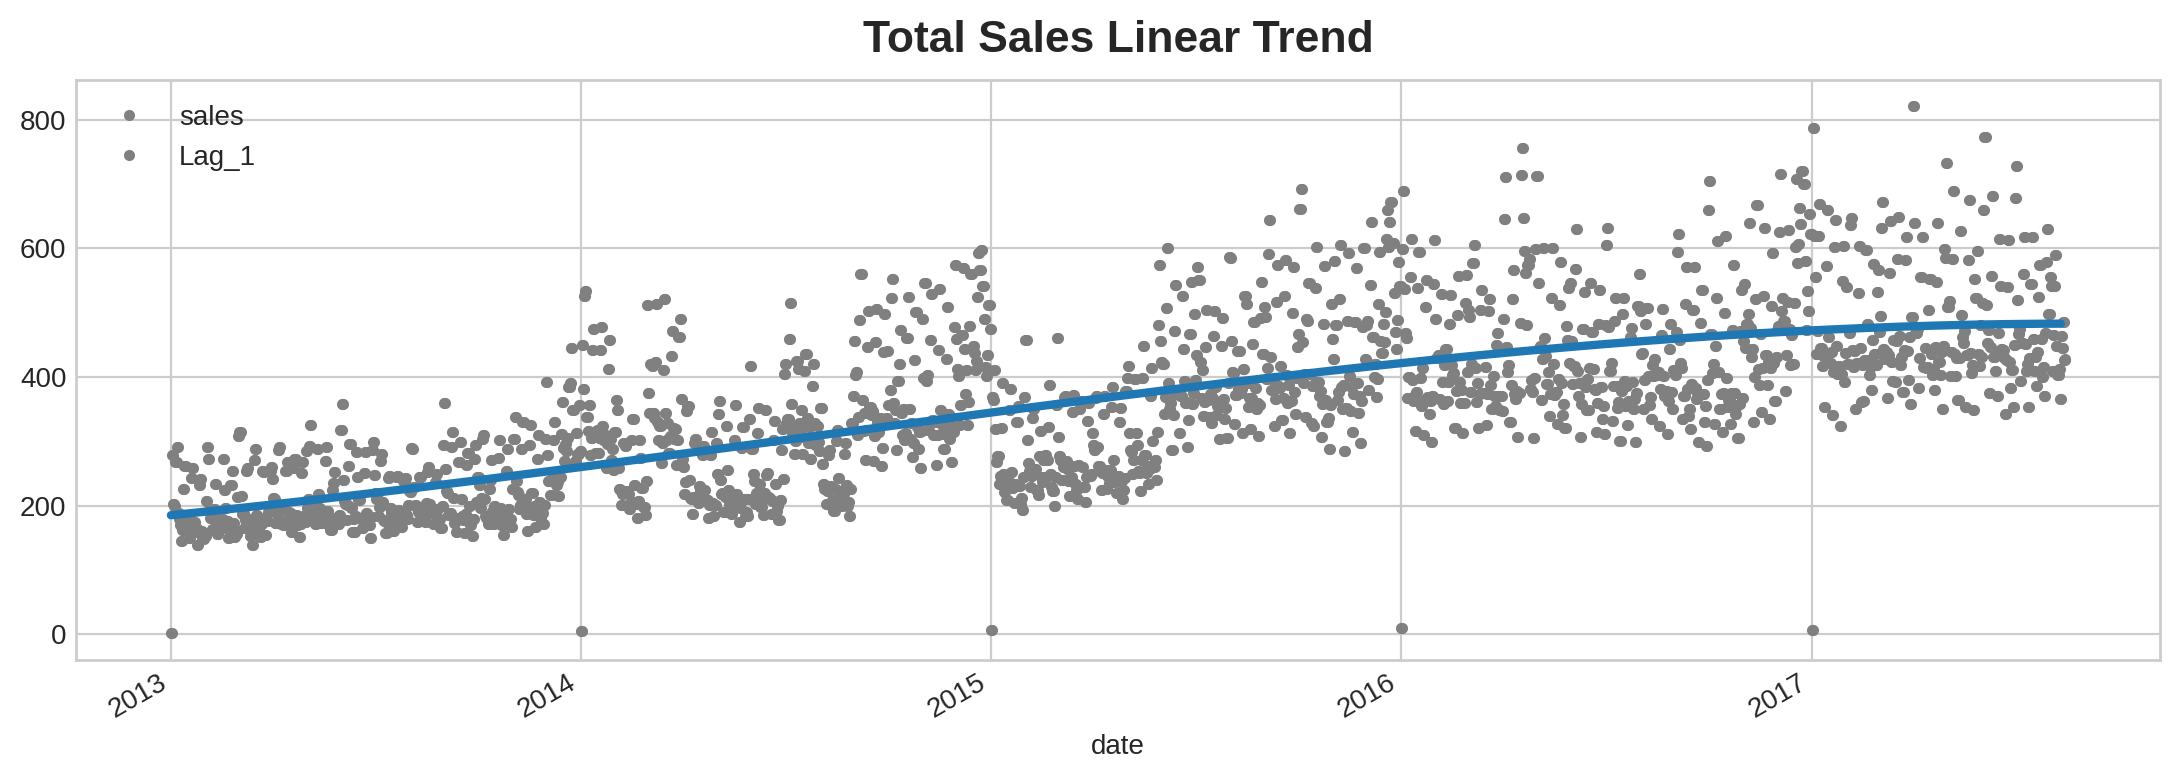

In [119]:
ax = average_sales.plot(style=".", color="0.5", title="Total Sales Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [120]:
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

y_fore

2017-08-12    482.862720
2017-08-13    482.866985
2017-08-14    482.870839
2017-08-15    482.874280
2017-08-16    482.877308
                 ...    
2017-11-05    481.717490
2017-11-06    481.685406
2017-11-07    481.652879
2017-11-08    481.619908
2017-11-09    481.586492
Freq: D, Length: 90, dtype: float64

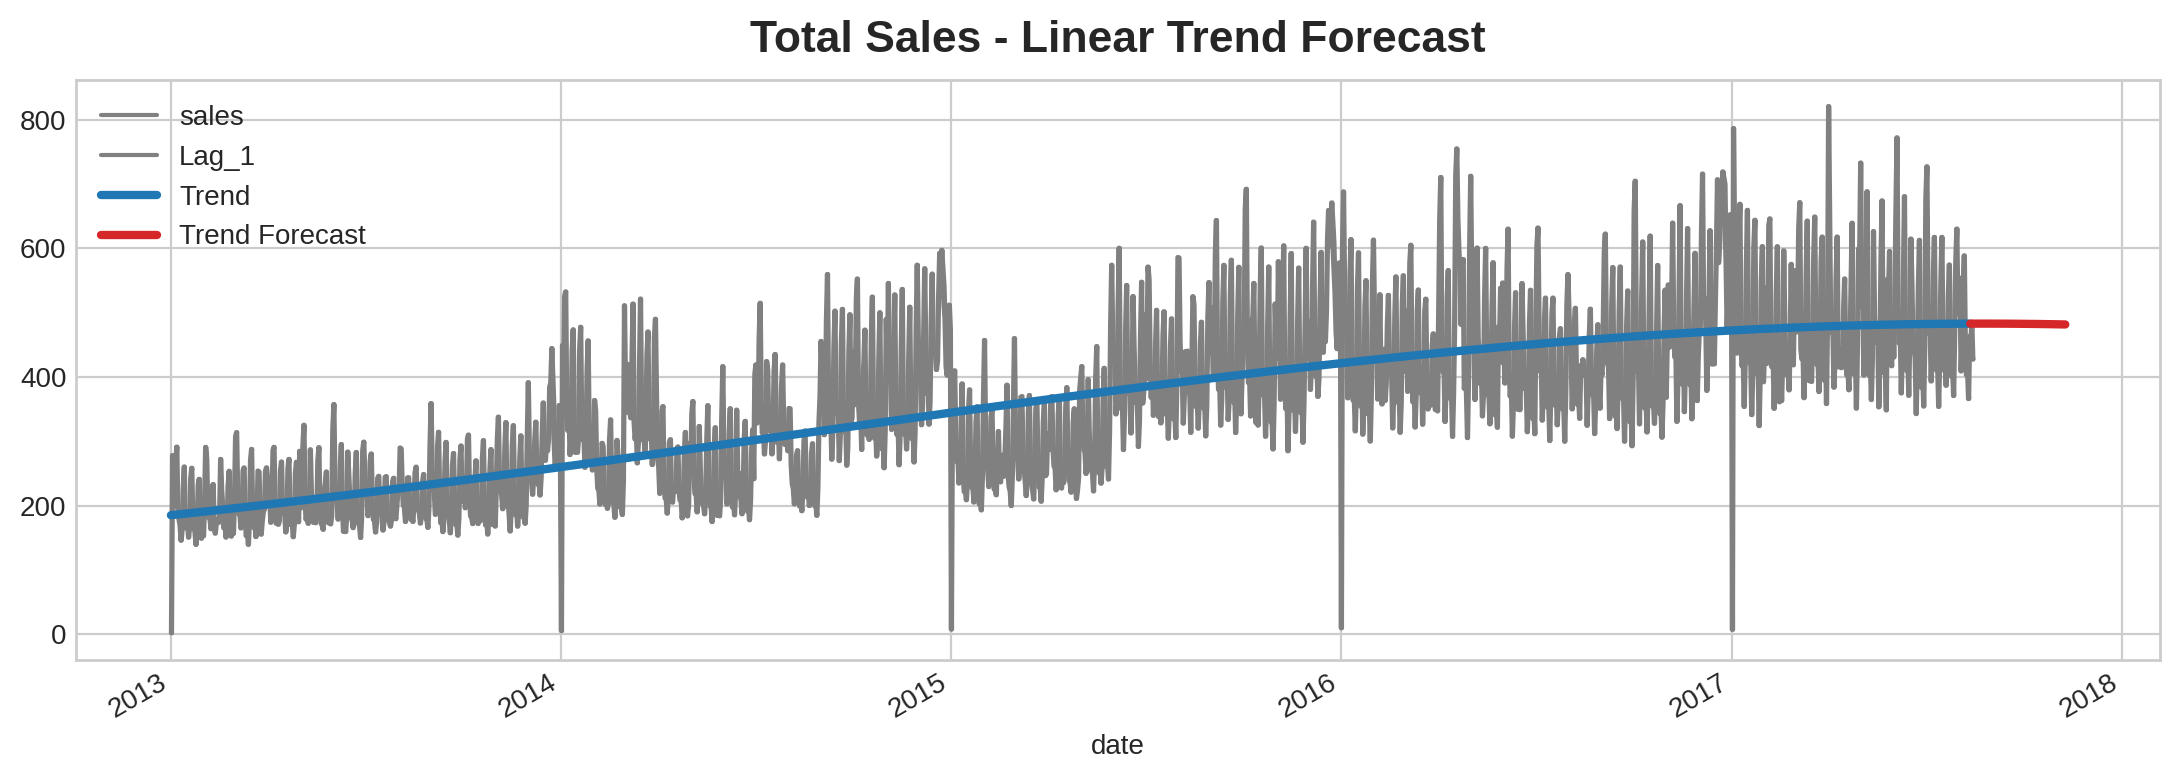

In [121]:
ax = average_sales.plot(title="Total Sales - Linear Trend Forecast", color="0.5",)
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

### Seasonality

In [122]:
holiday_df = pd.read_csv('/home/karen/Documents/Datasets/Store Sales Forecasting/holidays_events.csv')
holiday_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [123]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

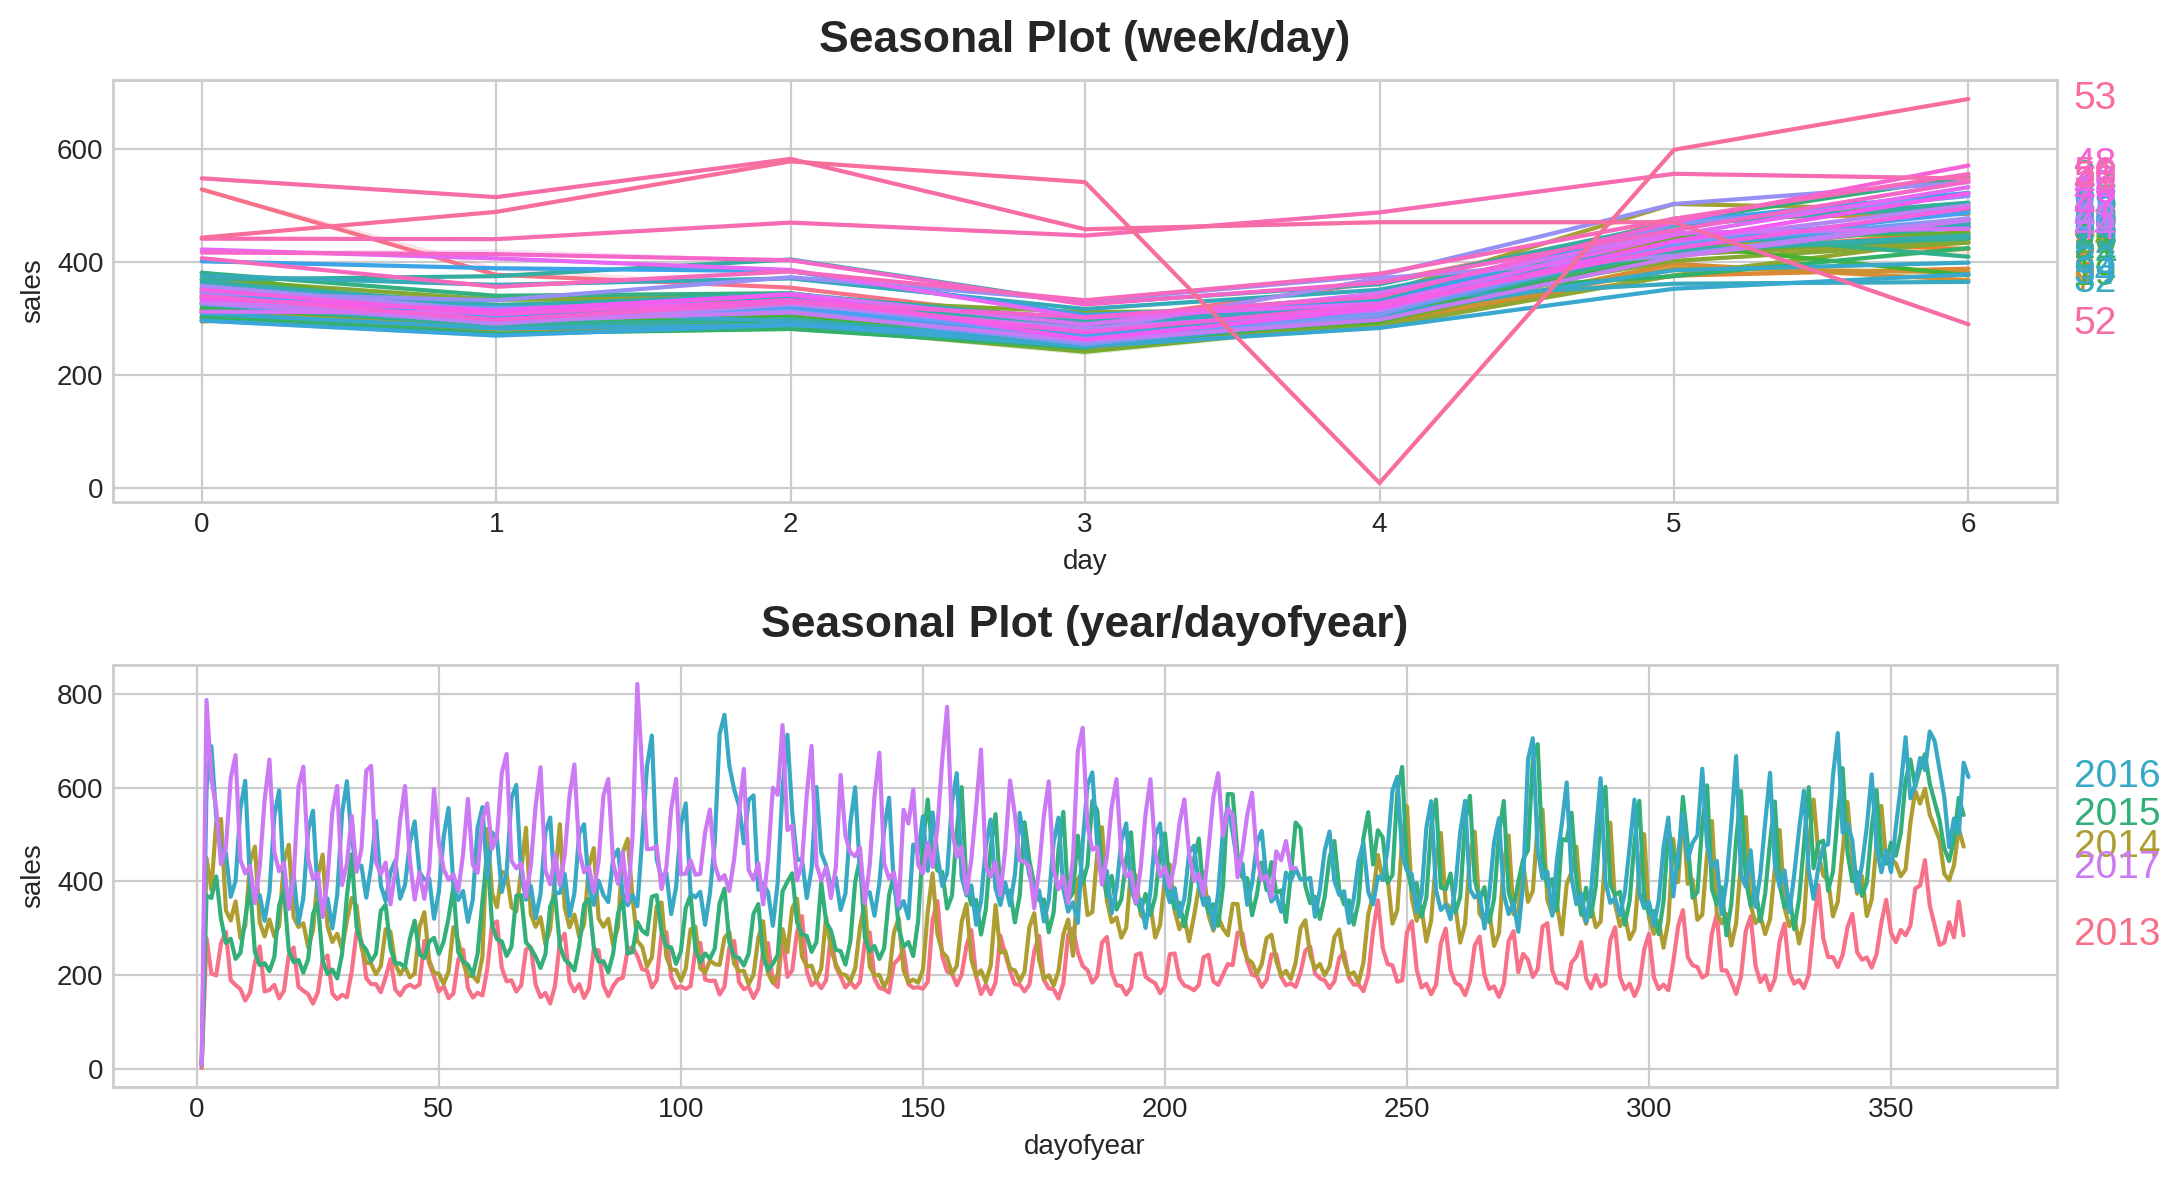

In [127]:
X_seasonality = average_sales.copy()

# days within a week
X_seasonality["day"] = X.index.dayofweek  # the x-axis (freq)
X_seasonality["week"] = X.index.week  # the seasonal period (period)

# days within a year
X_seasonality["dayofyear"] = X_seasonality.index.dayofyear
X_seasonality["year"] = X_seasonality.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X_seasonality, y="sales", period="week", freq="day", ax=ax0)
seasonal_plot(X_seasonality, y="sales", period="year", freq="dayofyear", ax=ax1);

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

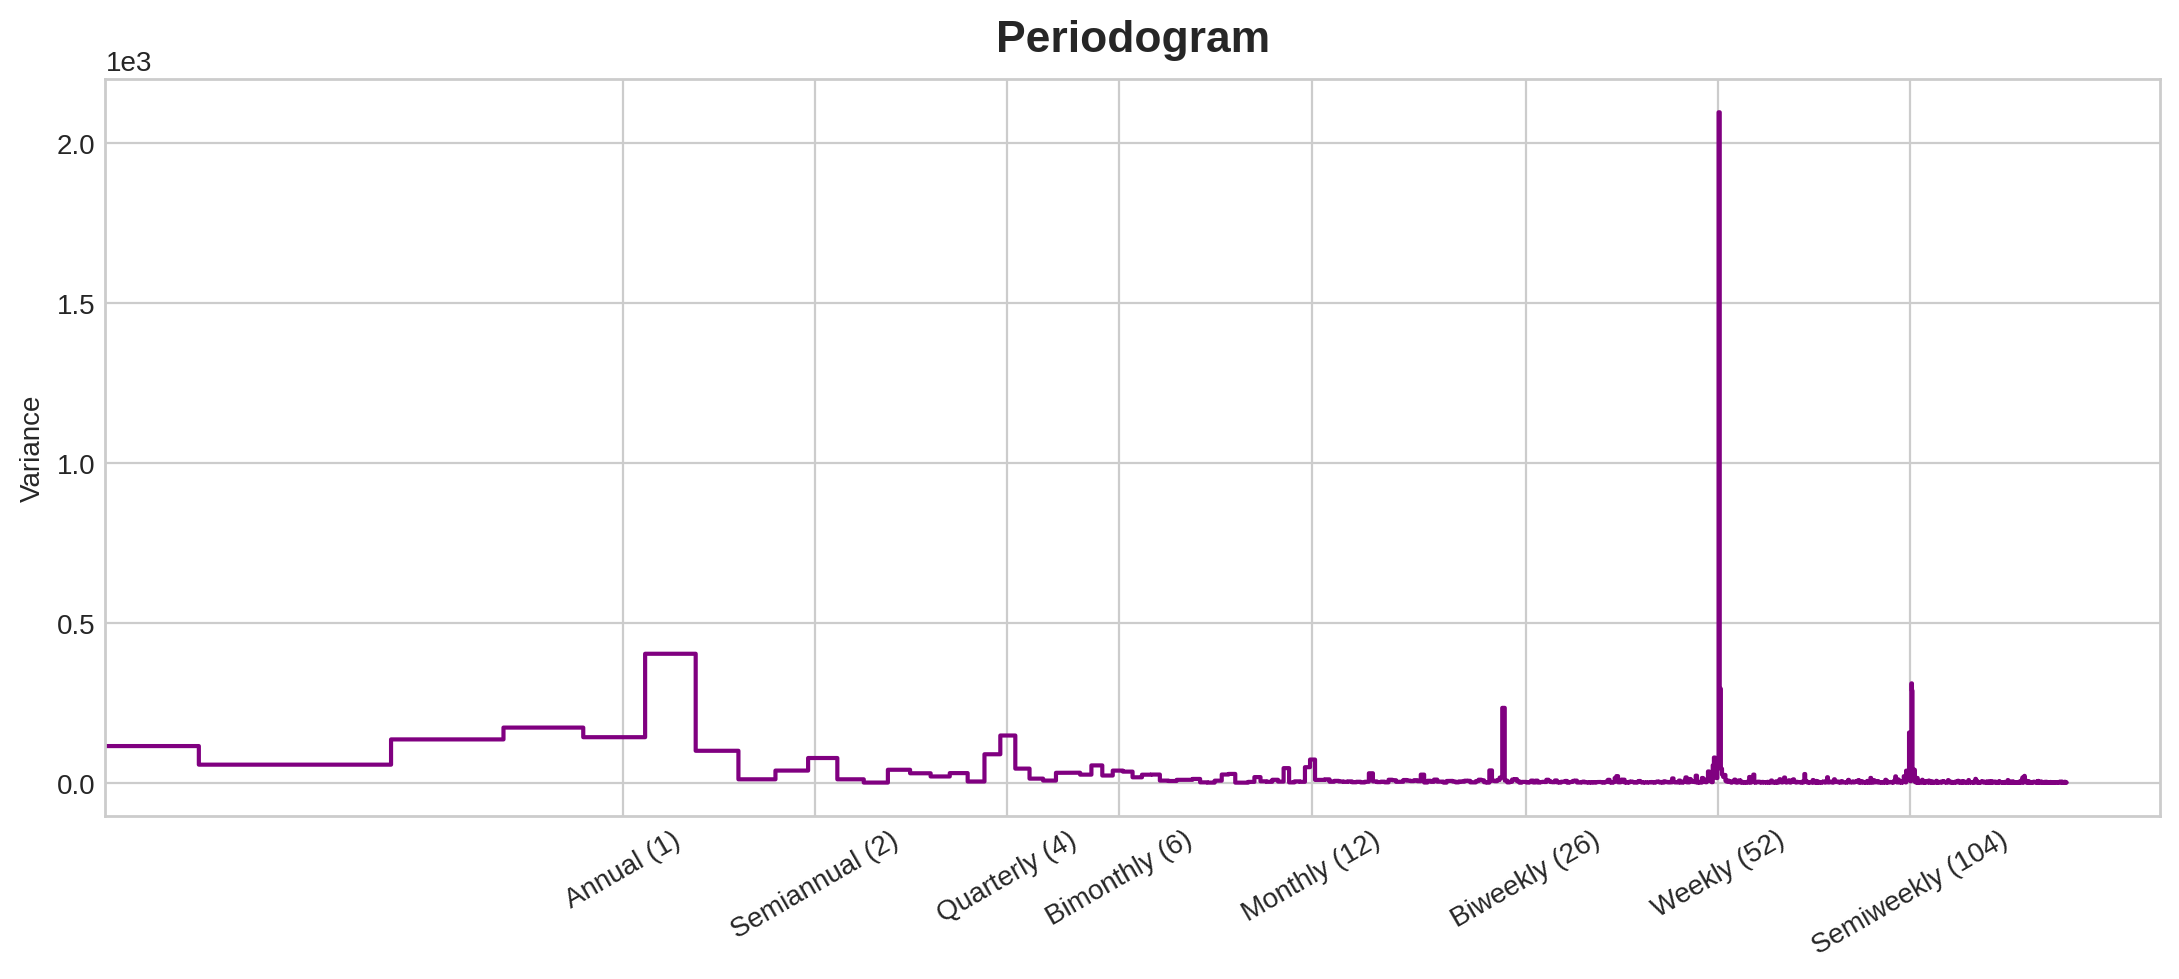

In [128]:
plot_periodogram(average_sales.sales)

In [146]:
from statsmodels.tsa.deterministic import CalendarFourier

index = pd.period_range("2013-01-01", freq="D", periods=1684)

fourier = CalendarFourier(freq='A', order=12)

dp = DeterministicProcess(
    index=index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()
X

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=A-DEC)","cos(1,freq=A-DEC)",...,"sin(8,freq=A-DEC)","cos(8,freq=A-DEC)","sin(9,freq=A-DEC)","cos(9,freq=A-DEC)","sin(10,freq=A-DEC)","cos(10,freq=A-DEC)","sin(11,freq=A-DEC)","cos(11,freq=A-DEC)","sin(12,freq=A-DEC)","cos(12,freq=A-DEC)"
2013-01-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000
2013-01-02,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.017213,0.999852,...,0.137279,0.990532,0.154309,0.988023,1.712931e-01,0.985220,0.188227,0.982126,0.205104,0.978740
2013-01-03,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.034422,0.999407,...,0.271958,0.962309,0.304921,0.952378,3.375229e-01,0.941317,0.369725,0.929141,0.401488,0.915864
2013-01-04,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.051620,0.998667,...,0.401488,0.915864,0.448229,0.893919,4.937756e-01,0.869589,0.538005,0.842942,0.580800,0.814046
2013-01-05,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.068802,0.997630,...,0.523416,0.852078,0.580800,0.814046,6.354323e-01,0.772157,0.687053,0.726608,0.735417,0.677615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-07,1.0,1680.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.573772,-0.819015,...,-0.984474,0.175531,0.705584,-0.708627,-1.712931e-01,0.985220,-0.425000,-0.905193,0.867456,0.497513
2017-08-08,1.0,1681.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587785,-0.809017,...,-0.951057,0.309017,0.587785,-0.809017,-1.469576e-15,1.000000,-0.587785,-0.809017,0.951057,0.309017
2017-08-09,1.0,1682.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.601624,-0.798779,...,-0.899631,0.436651,0.455907,-0.890028,1.712931e-01,0.985220,-0.729558,-0.683919,0.994218,0.107381
2017-08-10,1.0,1683.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.615285,-0.788305,...,-0.831171,0.556017,0.313107,-0.949718,3.375229e-01,0.941317,-0.845249,-0.534373,0.995105,-0.098820


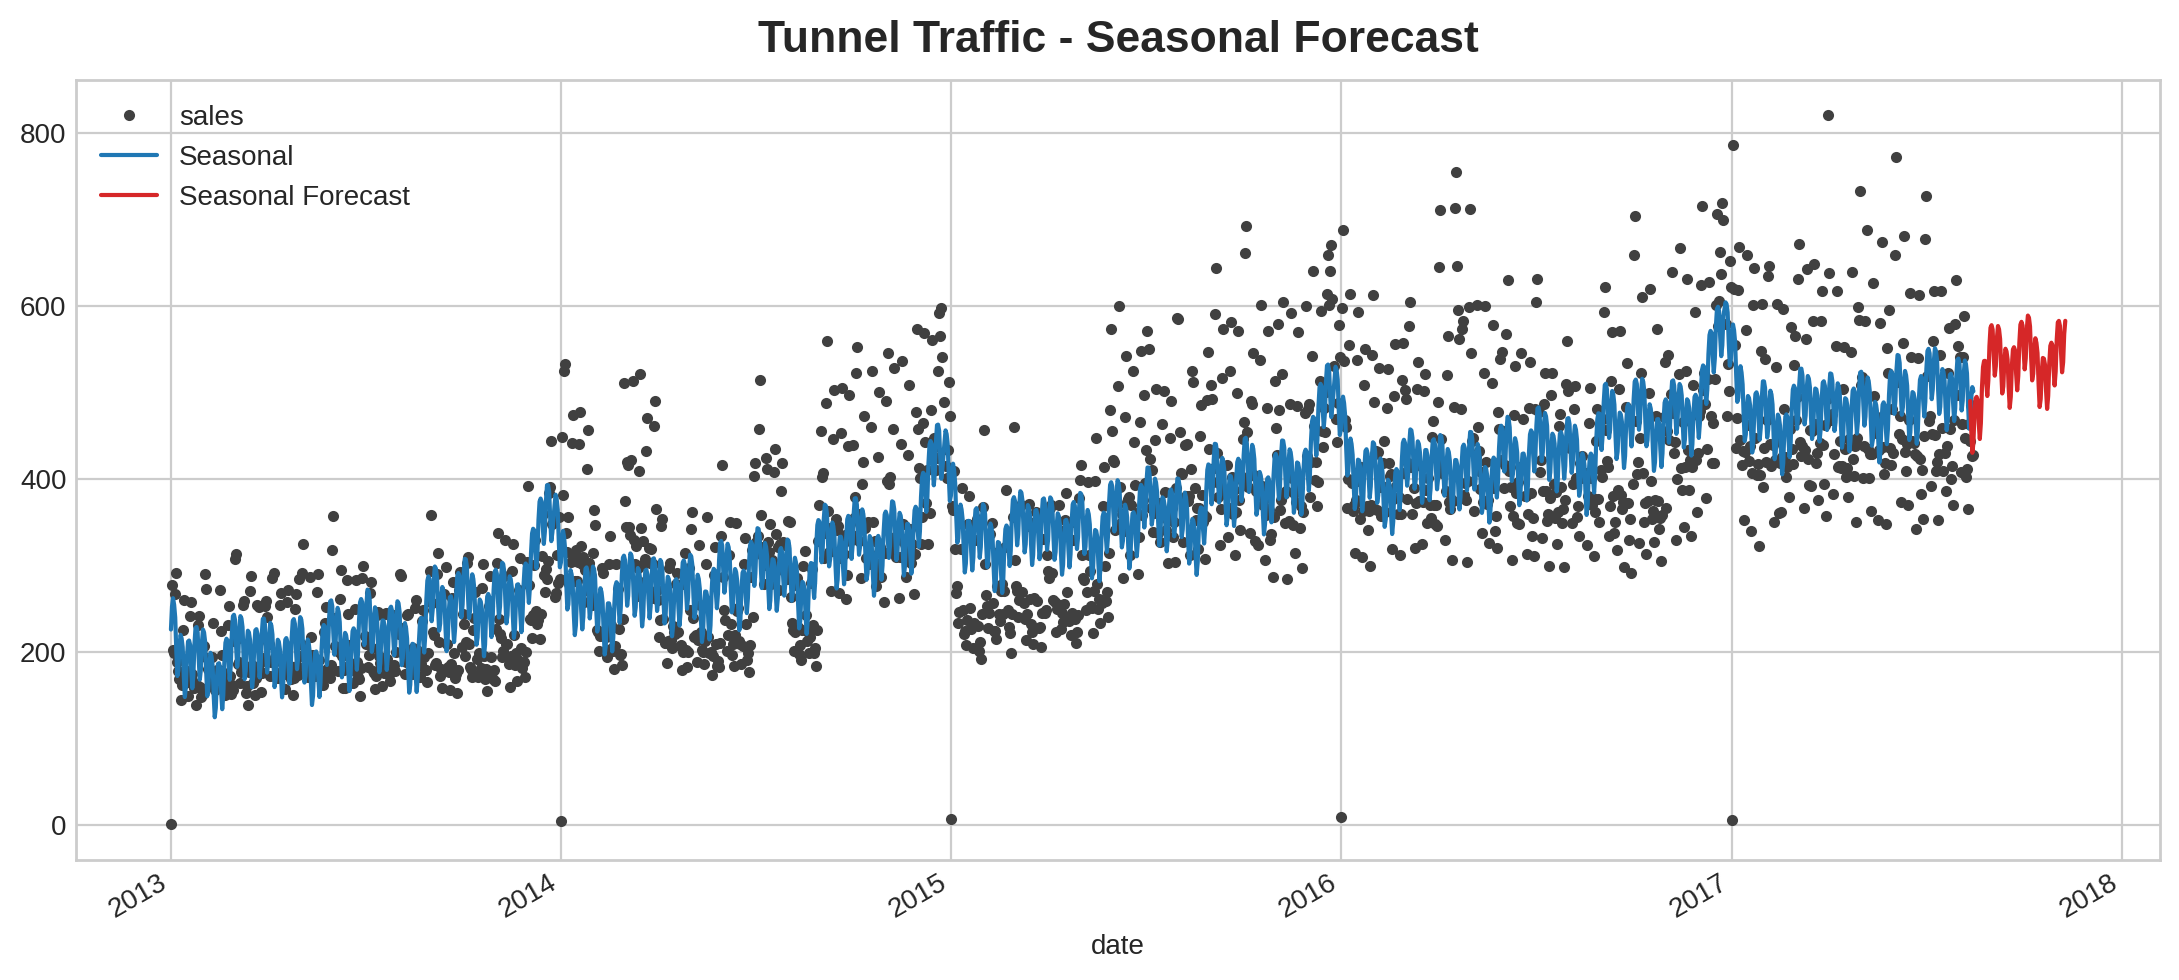

In [147]:
y = average_sales.sales

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()